# CALCULATING THE MOVING AVERAGE 

In [1]:
def rolling_mean(data, window_size, min_periods=1):
    rolling_means = []
    for i in range(len(data)):
        if i < window_size - 1:
            window = data[:i + 1]
        else:
            window = data[i - window_size + 1:i + 1]
        if len(window) >= min_periods:
            mean = sum(window) / len(window)
        else:
            mean = None
        rolling_means.append(mean)
    return rolling_means
     

In [2]:
#check the function with row data
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
window_size = 3
min_periods = 1

rolling_means = rolling_mean(data, window_size, min_periods)
print(rolling_means)


[1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


# Calcualate the EMA value

In [3]:
def calculate_ema(closing_prices, periods):
    ema_values = []  # List to store the EMA values

    if periods >= 1:
        alpha = 2 / (periods + 1)  # Calculate the smoothing factor
        ema = closing_prices[0]  # Set the initial EMA to the first closing price
        ema_values.append(ema)  # Add the initial EMA to the EMA values

    for i in range(1, len(closing_prices)):
        current_price = closing_prices[i]
        ema = (current_price - ema) * alpha + ema  # Calculate the EMA
        ema_values.append(ema)  # Add the EMA to the list

    return ema_values


#check the function with row data
data= [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
periods =2

ema_values = calculate_ema(data, periods)
print(ema_values)


[10, 13.333333333333332, 17.77777777777778, 22.59259259259259, 27.530864197530864, 32.510288065843625, 37.503429355281206, 42.501143118427066, 47.50038103947569, 52.50012701315856]


# Calculated the RSI value (relative strength index)


In [4]:
def calculate_rsi(prices, periods):
    gains = []
    losses = []

    for i in range(1, len(prices)):
        price_diff = prices[i] - prices[i-1]
        if price_diff > 0:
            gains.append(price_diff)
            losses.append(0)
        else:
            gains.append(0)
            losses.append(abs(price_diff))

    avg_gain = sum(gains[:periods]) / periods
    avg_loss = sum(losses[:periods]) / periods

    rsi_values = [100 - (100 / (1 + avg_gain / avg_loss))]

    for i in range(1, len(prices)-1):
        current_gain = gains[i]
        current_loss = losses[i]
        avg_gain = ((avg_gain * (periods - 1)) + current_gain) / periods
        avg_loss = ((avg_loss * (periods - 1)) + current_loss) / periods
        rsi = 100 - (100 / (1 + avg_gain / avg_loss))
        rsi_values.append(rsi)

    return rsi_values

prices = [50, 52, 49, 48, 51, 50, 49, 47, 50, 53]
periods = 14

rsi_values = calculate_rsi(prices, periods)
print(rsi_values)


[57.89473684210526, 49.48096885813149, 47.02757399443461, 54.34159105013335, 51.77537741751886, 49.269700547485016, 44.61882615808239, 51.946346642193234, 57.939483187330495]


# calculate the MACD, mean average convergence Divergence

In [5]:
def calculate_macd(prices, short_period, long_period, signal_period):
    short_ema_values = calculate_ema(prices, short_period)
    long_ema_values = calculate_ema(prices, long_period)

    macd_line = [short_ema - long_ema for short_ema, long_ema in zip(short_ema_values, long_ema_values)]

    signal_line = calculate_ema(macd_line, signal_period)

    macd_histogram = [macd - signal for macd, signal in zip(macd_line, signal_line)]

    return macd_line, signal_line, macd_histogram

def calculate_ema(prices, periods):
    ema_values = []

    alpha = 2 / (periods + 1)  # Calculate the smoothing factor
    ema = sum(prices[:periods]) / periods  # Calculate the initial EMA
    ema_values.append(ema)  # Add the initial EMA to the EMA values

    for i in range(1, len(prices)):
        current_price = prices[i]
        ema = (current_price - ema) * alpha + ema  # Calculate the EMA
        ema_values.append(ema)  # Add the EMA to the list

    return ema_values

prices = [50, 52, 49, 48, 51, 50, 49, 47, 50, 53]
short_period = 12
long_period = 26
signal_period = 9

macd_line, signal_line, macd_histogram = calculate_macd(prices, short_period, long_period, signal_period)
print("MACD Line:", macd_line)
print("Signal Line:", signal_line)
print("MACD Histogram:", macd_histogram)


MACD Line: [22.391025641025642, 21.563390313390315, 20.42990519557471, 19.22925554263571, 18.308755039134944, 17.29914632511999, 16.23122899846873, 15.05002620410129, 14.192388388524506, 13.598029548531017]
Signal Line: [18.299457960886205, 18.952244431387026, 19.247776584224564, 19.244072375906793, 19.057008908552422, 18.705436391865938, 18.210594913186497, 17.578481171369457, 16.901262614800466, 16.240616001546577]
MACD Histogram: [4.091567680139438, 2.6111458820032887, 1.182128611350148, -0.014816833271083851, -0.7482538694174785, -1.406290066745946, -1.9793659147177678, -2.5284549672681678, -2.7088742262759595, -2.6425864530155607]


# Calculating the One-balance volume (OBV)

In [6]:
def calculate_obv(prices, volumes):
    obv = [0]  # Initialize OBV with zero

    for i in range(1, len(prices)):
        if prices[i] > prices[i-1]:
            obv.append(obv[i-1] + volumes[i])  # Add volume to OBV if price increases
        elif prices[i] < prices[i-1]:
            obv.append(obv[i-1] - volumes[i])  # Subtract volume from OBV if price decreases
        else:
            obv.append(obv[i-1])  # Keep the same OBV if price remains unchanged

    return obv

prices = [50, 52, 49, 48, 51, 50, 49, 47, 50, 53]
volumes = [100, 120, 80, 90, 110, 100, 95, 130, 115, 105]

obv = calculate_obv(prices, volumes)
print("OBV:", obv)


OBV: [0, 120, 40, -50, 60, -40, -135, -265, -150, -45]


# Parabolic Stop and Reverse (Parabolic SAR)

In [7]:
def calculate_sar(dataset, acceleration=0.02, max_acceleration=0.2):
    sar_values = []  # List to store the SAR values

    # Initialize SAR values
    sar = dataset[0]
    sar_values.append(sar)

    # Define initial state
    trend = 1 if dataset[1] > dataset[0] else -1
    ep = dataset[0]
    af = acceleration

    for i in range(1, len(dataset)):
        if trend == 1:
            if dataset[i] < sar:
                sar_values.append(sar)
                trend = -1
                sar = ep
                ep = dataset[i]
                af = acceleration
            else:
                sar = sar + af * (ep - sar)
                sar_values.append(sar)
                if dataset[i] > ep:
                    ep = dataset[i]
                    af = min(af + acceleration, max_acceleration)
        else:
            if dataset[i] > sar:
                sar_values.append(sar)
                trend = 1
                sar = ep
                ep = dataset[i]
                af = acceleration
            else:
                sar = sar - af * (sar - ep)
                sar_values.append(sar)
                if dataset[i] < ep:
                    ep = dataset[i]
                    af = min(af + acceleration, max_acceleration)

    return sar_values

# Example usage
dataset = [50, 52, 49, 48, 51, 50, 49, 47, 50, 53]
sar_values = calculate_sar(dataset)
print("SAR values:", sar_values)


SAR values: [50, 50.0, 50.0, 51.94, 51.782399999999996, 51.63110399999999, 51.485859839999996, 51.3464254464, 51.085639919616, 51.085639919616]


# CALCULATE THE BOLLINGLER BANDS 

In [8]:
import math

def calculate_bollinger_bands(prices, periods):
    sma_values = []
    sd_values = []
    upper_band_values = []
    lower_band_values = []

    for i in range(periods - 1, len(prices)):
        sma = sum(prices[i - periods + 1: i + 1]) / periods
        sma_values.append(sma)

        variance = sum((price - sma) ** 2 for price in prices[i - periods + 1: i + 1]) / periods
        sd = math.sqrt(variance)
        sd_values.append(sd)

        upper_band = sma + 2 * sd
        upper_band_values.append(upper_band)

        lower_band = sma - 2 * sd
        lower_band_values.append(lower_band)

    return sma_values, upper_band_values, lower_band_values

prices = [50, 52, 49, 48, 51, 50, 49, 47, 50, 53]
periods = 1

sma, upper_band, lower_band = calculate_bollinger_bands(prices, periods)
print("SMA:", sma)
print("Upper Band:", upper_band)
print("Lower Band:", lower_band)


SMA: [50.0, 52.0, 49.0, 48.0, 51.0, 50.0, 49.0, 47.0, 50.0, 53.0]
Upper Band: [50.0, 52.0, 49.0, 48.0, 51.0, 50.0, 49.0, 47.0, 50.0, 53.0]
Lower Band: [50.0, 52.0, 49.0, 48.0, 51.0, 50.0, 49.0, 47.0, 50.0, 53.0]


# Calculating Stochastic Oscillator

In [9]:
import pandas as pd

def calculate_stochastic_oscillator(data, period=14):
    # Calculate the lowest low and highest high over the period
    lowest_low = data['Low'].rolling(window=period,min_periods=1).min()
    highest_high = data['High'].rolling(window=period,min_periods=1).max()
    
    # Calculate the %K line
    data['K'] = ((data['Close'] - lowest_low) / (highest_high - lowest_low)) * 100
    
    # Calculate the %D line using a 3-period simple moving average
    data['D'] = data['K'].rolling(window=3,min_periods=1).mean()
    
    return data['K'], data['D']


# Average True Rate(ATR)

In [31]:
import pandas as pd

def calculate_atr(data, period=14):
    high = data['High']
    low = data['Low']
    close = data['Close']
    
    true_range = pd.DataFrame(index=data.index)
    true_range['High-Low'] = high - low
    true_range['High-PrevClose'] = abs(high - close.shift(1))
    true_range['Low-PrevClose'] = abs(low - close.shift(1))
    
    true_range['TR'] = true_range.max(axis=1)
    atr = true_range['TR'].rolling(window=period,min_periods=1).mean()
    
    return atr



# On-Balance Volume

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_obv(data):
    obv = pd.Series(0, index=data.index)
    obv[data['Close'] > data['Close'].shift()] = data['Volume']
    obv[data['Close'] < data['Close'].shift()] = -data['Volume']
    obv = obv.cumsum()
    return obv

# Volume Weighted Average Price

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_vwap(data):
    cum_volume = (data['Volume'] * (data['High'] + data['Low'] + data['Close']) / 3).cumsum()
    vwap = cum_volume / data['Volume'].cumsum()
    return vwap




# Chaikin MOney Flow

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_cmf(data, period=20):
    money_flow_multiplier = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low'])
    money_flow_volume = money_flow_multiplier * data['Volume']
    cmf = money_flow_volume.rolling(window=period,min_periods=1).sum() / data['Volume'].rolling(window=period,min_periods=1).sum()
    return cmf


# Average Directional Index function

In [69]:
import pandas as pd

def calculate_adx(data, period=14):
    high = data['High']
    low = data['Low']
    close = data['Close']

    # Calculate True Range (TR)
    tr = pd.DataFrame(index=data.index)
    tr['H-L'] = high - low
    tr['H-PC'] = abs(high - close.shift(1))
    tr['L-PC'] = abs(low - close.shift(1))
    tr['TR'] = tr.max(axis=1)

    # Calculate +DM and -DM
    plus_dm = high.diff()
    plus_dm[plus_dm < 0] = 0
    minus_dm = low.diff()
    minus_dm[minus_dm > 0] = 0

    # Calculate Smoothed+DM and Smoothed-DM
    smooth_plus_dm = plus_dm.rolling(window=period,min_periods=1).mean()
    smooth_minus_dm = minus_dm.rolling(window=period,min_periods=1).mean()

    # Calculate DX
    dx = (abs(smooth_plus_dm - smooth_minus_dm) / (smooth_plus_dm + smooth_minus_dm)) * 100

    # Calculate ADX
    adx = dx.rolling(window=period,min_periods=1).mean()
    adx=adx.fillna(adx[1])

    return adx


# Parabolic SAR

In [72]:
import pandas as pd

def calculate_parabolic_sar(data, acceleration_factor=0.02, max_acceleration_factor=0.2):
    high = data['High']
    low = data['Low']

    # Initialize variables
    trend = 1  # 1 for upward trend, -1 for downward trend
    sar = low.iloc[0]
    ep = high.iloc[0]
    af = acceleration_factor
    sar_values = [sar]

    for i in range(1, len(data)):
        # Calculate SAR value for the current period
        prev_sar = sar
        if trend == 1:  # Upward trend
            if low.iloc[i-1] < sar:
                sar = low.iloc[i-1]
                af = min(af + acceleration_factor, max_acceleration_factor)
            if high.iloc[i] > ep:
                ep = high.iloc[i]
                af = min(af + acceleration_factor, max_acceleration_factor)
        else:  # Downward trend
            if high.iloc[i-1] > sar:
                sar = high.iloc[i-1]
                af = min(af + acceleration_factor, max_acceleration_factor)
            if low.iloc[i] < ep:
                ep = low.iloc[i]
                af = min(af + acceleration_factor, max_acceleration_factor)

        sar += af * (ep - sar)

        # Switch trend and reset SAR if necessary
        if trend == 1 and sar > low.iloc[i]:
            trend = -1
            sar = ep
            ep = low.iloc[i]
            af = acceleration_factor
        elif trend == -1 and sar < high.iloc[i]:
            trend = 1
            sar = ep
            ep = high.iloc[i]
            af = acceleration_factor

        sar_values.append(sar)

    return pd.Series(sar_values, index=data.index)

# Commodity channel index

In [75]:
import pandas as pd

def calculate_cci(data, period=20):
    typical_price = (data['High'] + data['Low'] + data['Close']) / 3
    tp_sma = typical_price.rolling(window=period,min_periods=1).mean()
    mean_deviation = abs(typical_price - tp_sma)
    average_deviation = mean_deviation.rolling(window=period,min_periods=1).mean()
    constant = 0.015
    cci = (typical_price - tp_sma) / (constant * average_deviation)
    cci=cci.fillna(np.mean(cci))
    return cci

# Moving Average Envelope

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_envelopes(data, period=20, percentage=2):
    moving_average = data['Close'].rolling(window=period,min_periods=1).mean()
    upper_envelope = moving_average * (1 + percentage/100)
    lower_envelope = moving_average * (1 - percentage/100)
    return moving_average, upper_envelope, lower_envelope

# Rate of Change function (ROC)

In [86]:
import pandas as pd

def calculate_roc(data, period=14):
    close_prices = data['Close']
    roc = (close_prices / close_prices.shift(period)) - 1
    roc_new=roc.fillna(np.max(roc))
    return roc_new



# Williams %R function 

In [92]:
import pandas as pd

def calculate_williams_r(data, period=14):
    high = data['High']
    low = data['Low']
    close = data['Close']

    highest_high = high.rolling(window=period,min_periods=1).max()
    lowest_low = low.rolling(window=period,min_periods=1).min()

    williams_r = (highest_high - close) / (highest_high - lowest_low) * -100
    return williams_r

# Price rate of Change (PROC) function

In [97]:
import pandas as pd

def calculate_proc(data, period=12):
    close_prices = data['Close']
    proc = (close_prices / close_prices.shift(period)) * 100
    proc_new=proc.fillna(np.mean(proc))
    return proc_new

# Chande Momentum Oscillator

In [102]:
import pandas as pd

def calculate_cmo(data, period=20):
    close_prices = data['Close']
    prev_close = close_prices.shift(1)
    up_sum = ((close_prices - prev_close) > 0).rolling(window=period,min_periods=1).sum()
    down_sum = ((prev_close - close_prices) > 0).rolling(window=period,min_periods=1).sum()
    cmo = ((up_sum - down_sum) / (up_sum + down_sum)) * 100
    cmo_new=cmo.fillna(cmo.max())
    
    return cmo_new

# Accumulation/Distribution Line

In [107]:
import pandas as pd

def calculate_ad_line(data):
    close_prices = data['Close']
    high_prices = data['High']
    low_prices = data['Low']
    volumes = data['Volume']

    money_flow_volume = ((close_prices - low_prices) - (high_prices - close_prices)) / (high_prices - low_prices) * volumes
    ad_line = money_flow_volume.cumsum()
    return ad_line

# TRIX function

In [110]:
def calculate_trix(data, period=15):
    close_prices = data['Close']
    
    ema_1 = close_prices.ewm(span=period, adjust=False,min_periods=1).mean()
    ema_2 = ema_1.ewm(span=period, adjust=False,min_periods=1).mean()
    ema_3 = ema_2.ewm(span=period, adjust=False,min_periods=1).mean()
    
    trix = (ema_3 - ema_3.shift(1)) / ema_3.shift(1) * 100
    trix_new=trix.fillna(np.mean(trix))
    return trix_new

# Ease Of Movement(EOM)

In [115]:
def calculate_eom(data, period=14):
    high_prices = data['High']
    low_prices = data['Low']
    volume = data['Volume']
    
    distance_moved = ((high_prices + low_prices) / 2) - ((high_prices.shift(1) + low_prices.shift(1)) / 2)
    box_ratio = volume / (high_prices - low_prices)
    
    eom = distance_moved / box_ratio
    eom_ma = eom.rolling(window=period,min_periods=1).mean()
    eom_new=eom.fillna(np.mean(eom))
    
    return eom_new

In [39]:
import pandas as pd 
import numpy as np

In [40]:
dataset_1=pd.read_csv('infosys_new_data.csv',parse_dates=True,index_col='Date')
dataset_1

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2002-07-05   1.642813   1.704375   1.642188   1.671875   1.125311    960000
2002-07-08   1.699375   1.718125   1.671250   1.695313   1.141087   3520000
2002-07-09   1.701563   1.739063   1.664688   1.720313   1.157914   4240000
2002-07-10   1.705000   1.759063   1.691250   1.716875   1.155600   2364800
2002-07-11   1.727813   1.761250   1.659375   1.753438   1.180210   3388800
...               ...        ...        ...        ...        ...       ...
2023-06-27  15.610000  15.640000  15.460000  15.620000  15.620000   7913600
2023-06-28  15.680000  15.770000  15.550000  15.750000  15.750000   7520300
2023-06-29  15.780000  15.920000  15.690000  15.900000  15.900000   7992900
2023-06-30  16.170000  16.260000  16.020000  16.070000  16.070000  12763900
2023-07-03  16.190001  16.299999  16.049999  16.139999  16.139999   7111800

[5285 rows x 6 columns]

In [41]:
dad=dataset_1['Close']

In [42]:
# here i call the rolling_mean function for calculating the simple moving average

rolling_means = rolling_mean(dad, window_size, min_periods)
rolling_means

dataset_1['CLOSE_MOV_AVG_IND']=rolling_means
dataset_1

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2002-07-05   1.642813   1.704375   1.642188   1.671875   1.125311    960000   
2002-07-08   1.699375   1.718125   1.671250   1.695313   1.141087   3520000   
2002-07-09   1.701563   1.739063   1.664688   1.720313   1.157914   4240000   
2002-07-10   1.705000   1.759063   1.691250   1.716875   1.155600   2364800   
2002-07-11   1.727813   1.761250   1.659375   1.753438   1.180210   3388800   
...               ...        ...        ...        ...        ...       ...   
2023-06-27  15.610000  15.640000  15.460000  15.620000  15.620000   7913600   
2023-06-28  15.680000  15.770000  15.550000  15.750000  15.750000   7520300   
2023-06-29  15.780000  15.920000  15.690000  15.900000  15.900000   7992900   
2023-06-30  16.170000  16.260000  16.020000  16.070000  16.070000  12763900   
2023-07-03  16.190001  16.299999  16.049999  16.139999  16.139999   7111800   

            CLOSE_MOV_AVG_IND  
Date                           
2002-07-05           1.671875  
2002-07-08           1.683594  
2002-07-09           1.695834  
2002-07-10           1.710834  
2002-07-11           1.730209  
...                       ...  
2023-06-27          15.440000  
2023-06-28          15.623333  
2023-06-29          15.756667  
2023-06-30          15.906667  
2023-07-03          16.036666  

[5285 rows x 7 columns]

In [43]:
#  i am calling the function  calculate_ema which is define earlier 
ema_values = calculate_ema(dad, periods)
ema_values

#here i am adding the ema_values in orignal dataset
dataset_1['CLOSE_EMA_IND']=ema_values
dataset_1

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2002-07-05   1.642813   1.704375   1.642188   1.671875   1.125311    960000   
2002-07-08   1.699375   1.718125   1.671250   1.695313   1.141087   3520000   
2002-07-09   1.701563   1.739063   1.664688   1.720313   1.157914   4240000   
2002-07-10   1.705000   1.759063   1.691250   1.716875   1.155600   2364800   
2002-07-11   1.727813   1.761250   1.659375   1.753438   1.180210   3388800   
...               ...        ...        ...        ...        ...       ...   
2023-06-27  15.610000  15.640000  15.460000  15.620000  15.620000   7913600   
2023-06-28  15.680000  15.770000  15.550000  15.750000  15.750000   7520300   
2023-06-29  15.780000  15.920000  15.690000  15.900000  15.900000   7992900   
2023-06-30  16.170000  16.260000  16.020000  16.070000  16.070000  12763900   
2023-07-03  16.190001  16.299999  16.049999  16.139999  16.139999   7111800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  
Date                                          
2002-07-05           1.671875       1.671875  
2002-07-08           1.683594       1.695313  
2002-07-09           1.695834       1.720313  
2002-07-10           1.710834       1.716875  
2002-07-11           1.730209       1.753438  
...                       ...            ...  
2023-06-27          15.440000      15.620000  
2023-06-28          15.623333      15.750000  
2023-06-29          15.756667      15.900000  
2023-06-30          15.906667      16.070000  
2023-07-03          16.036666      16.139999  

[5285 rows x 8 columns]

# CALCUALTE THE RSIINDICATOR USING INBUILD

In [44]:
import pandas as pd
from ta.momentum import RSIIndicator

# Assuming you have a DataFrame named 'data' with a column named 'close' representing the closing prices

# Create the RSI indicator with a period length of 14
rsi_indicator = RSIIndicator(close=dataset_1['Close'],window=14,fillna=True)

# Calculate the RSI values
rsi_values = rsi_indicator.rsi()

# Add the RSI values as a new column to the DataFrame
rsi_values


Date
2002-07-05    100.000000
2002-07-08    100.000000
2002-07-09    100.000000
2002-07-10     92.663500
2002-07-11     96.013318
                 ...    
2023-06-27     50.986560
2023-06-28     53.717631
2023-06-29     56.714661
2023-06-30     59.885129
2023-07-03     61.147055
Name: rsi, Length: 5285, dtype: float64

In [45]:
# rsi_values = calculate_rsi(dad, periods)
# rsi_values
dataset_1['CLOSE_RSI_IND']=rsi_values
dataset_1
# # data_3=pd.DataFrame(data={'CLOSE_RSI_IND':rsi_values})
# # data_3

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2002-07-05   1.642813   1.704375   1.642188   1.671875   1.125311    960000   
2002-07-08   1.699375   1.718125   1.671250   1.695313   1.141087   3520000   
2002-07-09   1.701563   1.739063   1.664688   1.720313   1.157914   4240000   
2002-07-10   1.705000   1.759063   1.691250   1.716875   1.155600   2364800   
2002-07-11   1.727813   1.761250   1.659375   1.753438   1.180210   3388800   
...               ...        ...        ...        ...        ...       ...   
2023-06-27  15.610000  15.640000  15.460000  15.620000  15.620000   7913600   
2023-06-28  15.680000  15.770000  15.550000  15.750000  15.750000   7520300   
2023-06-29  15.780000  15.920000  15.690000  15.900000  15.900000   7992900   
2023-06-30  16.170000  16.260000  16.020000  16.070000  16.070000  12763900   
2023-07-03  16.190001  16.299999  16.049999  16.139999  16.139999   7111800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  
Date                                                         
2002-07-05           1.671875       1.671875     100.000000  
2002-07-08           1.683594       1.695313     100.000000  
2002-07-09           1.695834       1.720313     100.000000  
2002-07-10           1.710834       1.716875      92.663500  
2002-07-11           1.730209       1.753438      96.013318  
...                       ...            ...            ...  
2023-06-27          15.440000      15.620000      50.986560  
2023-06-28          15.623333      15.750000      53.717631  
2023-06-29          15.756667      15.900000      56.714661  
2023-06-30          15.906667      16.070000      59.885129  
2023-07-03          16.036666      16.139999      61.147055  

[5285 rows x 9 columns]

In [46]:
macd_line, signal_line, macd_histogram = calculate_macd(dad, short_period, long_period, signal_period)

# print("Signal Line:", signal_line)
# print("MACD Histogram:", macd_histogram)
dataset_1["CLOSE_IND_MACD_LINE"]=macd_line
dataset_1["CLOSE_IND_MACD_SINGLE_LINE"]=signal_line
dataset_1["CLOSE_IND_MACD_HISTOGRAM"]=macd_histogram


In [47]:
dataset_1

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2002-07-05   1.642813   1.704375   1.642188   1.671875   1.125311    960000   
2002-07-08   1.699375   1.718125   1.671250   1.695313   1.141087   3520000   
2002-07-09   1.701563   1.739063   1.664688   1.720313   1.157914   4240000   
2002-07-10   1.705000   1.759063   1.691250   1.716875   1.155600   2364800   
2002-07-11   1.727813   1.761250   1.659375   1.753438   1.180210   3388800   
...               ...        ...        ...        ...        ...       ...   
2023-06-27  15.610000  15.640000  15.460000  15.620000  15.620000   7913600   
2023-06-28  15.680000  15.770000  15.550000  15.750000  15.750000   7520300   
2023-06-29  15.780000  15.920000  15.690000  15.900000  15.900000   7992900   
2023-06-30  16.170000  16.260000  16.020000  16.070000  16.070000  12763900   
2023-07-03  16.190001  16.299999  16.049999  16.139999  16.139999   7111800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   
...                       ...            ...            ...   
2023-06-27          15.440000      15.620000      50.986560   
2023-06-28          15.623333      15.750000      53.717631   
2023-06-29          15.756667      15.900000      56.714661   
2023-06-30          15.906667      16.070000      59.885129   
2023-07-03          16.036666      16.139999      61.147055   

            CLOSE_IND_MACD_LINE  CLOSE_IND_MACD_SINGLE_LINE  \
Date                                                          
2002-07-05             0.036094                    0.034973   
2002-07-08             0.034505                    0.034879   
2002-07-09             0.034861                    0.034875   
2002-07-10             0.034468                    0.034794   
2002-07-11             0.036684                    0.035172   
...                         ...                         ...   
2023-06-27            -0.029453                   -0.013453   
2023-06-28            -0.010788                   -0.012920   
2023-06-29             0.015924                   -0.007151   
2023-06-30             0.050233                    0.004326   
2023-07-03             0.082124                    0.019886   

            CLOSE_IND_MACD_HISTOGRAM  
Date                                  
2002-07-05                  0.001121  
2002-07-08                 -0.000375  
2002-07-09                 -0.000015  
2002-07-10                 -0.000326  
2002-07-11                  0.001512  
...                              ...  
2023-06-27                 -0.016001  
2023-06-28                  0.002132  
2023-06-29                  0.023075  
2023-06-30                  0.045907  
2023-07-03                  0.062239  

[5285 rows x 12 columns]

In [48]:
dad_1=dataset_1['Volume']
dad_1


Date
2002-07-05      960000
2002-07-08     3520000
2002-07-09     4240000
2002-07-10     2364800
2002-07-11     3388800
                ...   
2023-06-27     7913600
2023-06-28     7520300
2023-06-29     7992900
2023-06-30    12763900
2023-07-03     7111800
Name: Volume, Length: 5285, dtype: int64

In [49]:
# here i call the calculate_obv function for calculating the one balance value

obv = calculate_obv(dad, dad_1)
obv
dataset_1["CLOSE_IND_OBV"]=obv
dataset_1

TypeError: calculate_obv() takes 1 positional argument but 2 were given

In [50]:
# calculate the parabolic SAR 

sar_values = calculate_sar(dad)
sar_values
dataset_1['CLOSE_IND_SAR']=sar_values
dataset_1

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2002-07-05   1.642813   1.704375   1.642188   1.671875   1.125311    960000   
2002-07-08   1.699375   1.718125   1.671250   1.695313   1.141087   3520000   
2002-07-09   1.701563   1.739063   1.664688   1.720313   1.157914   4240000   
2002-07-10   1.705000   1.759063   1.691250   1.716875   1.155600   2364800   
2002-07-11   1.727813   1.761250   1.659375   1.753438   1.180210   3388800   
...               ...        ...        ...        ...        ...       ...   
2023-06-27  15.610000  15.640000  15.460000  15.620000  15.620000   7913600   
2023-06-28  15.680000  15.770000  15.550000  15.750000  15.750000   7520300   
2023-06-29  15.780000  15.920000  15.690000  15.900000  15.900000   7992900   
2023-06-30  16.170000  16.260000  16.020000  16.070000  16.070000  12763900   
2023-07-03  16.190001  16.299999  16.049999  16.139999  16.139999   7111800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   
...                       ...            ...            ...   
2023-06-27          15.440000      15.620000      50.986560   
2023-06-28          15.623333      15.750000      53.717631   
2023-06-29          15.756667      15.900000      56.714661   
2023-06-30          15.906667      16.070000      59.885129   
2023-07-03          16.036666      16.139999      61.147055   

            CLOSE_IND_MACD_LINE  CLOSE_IND_MACD_SINGLE_LINE  \
Date                                                          
2002-07-05             0.036094                    0.034973   
2002-07-08             0.034505                    0.034879   
2002-07-09             0.034861                    0.034875   
2002-07-10             0.034468                    0.034794   
2002-07-11             0.036684                    0.035172   
...                         ...                         ...   
2023-06-27            -0.029453                   -0.013453   
2023-06-28            -0.010788                   -0.012920   
2023-06-29             0.015924                   -0.007151   
2023-06-30             0.050233                    0.004326   
2023-07-03             0.082124                    0.019886   

            CLOSE_IND_MACD_HISTOGRAM  CLOSE_IND_SAR  
Date                                                 
2002-07-05                  0.001121       1.671875  
2002-07-08                 -0.000375       1.671875  
2002-07-09                 -0.000015       1.672813  
2002-07-10                 -0.000326       1.675663  
2002-07-11                  0.001512       1.678342  
...                              ...            ...  
2023-06-27                 -0.016001      15.768855  
2023-06-28                  0.002132      15.734724  
2023-06-29                  0.023075      15.734724  
2023-06-30                  0.045907      15.214000  
2023-07-03                  0.062239      15.248240  

[5285 rows x 13 columns]

In [51]:
# CALCULATE THE BOLLINGER BANDS 

sma, upper_band, lower_band = calculate_bollinger_bands(dad, periods)

dataset_1['bollinger_bands_sma']=sma
dataset_1['bollinger_bands_upper_band']=upper_band
dataset_1['bollinger_bands_lower_band']=lower_band
dataset_1

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2002-07-05   1.642813   1.704375   1.642188   1.671875   1.125311    960000   
2002-07-08   1.699375   1.718125   1.671250   1.695313   1.141087   3520000   
2002-07-09   1.701563   1.739063   1.664688   1.720313   1.157914   4240000   
2002-07-10   1.705000   1.759063   1.691250   1.716875   1.155600   2364800   
2002-07-11   1.727813   1.761250   1.659375   1.753438   1.180210   3388800   
...               ...        ...        ...        ...        ...       ...   
2023-06-27  15.610000  15.640000  15.460000  15.620000  15.620000   7913600   
2023-06-28  15.680000  15.770000  15.550000  15.750000  15.750000   7520300   
2023-06-29  15.780000  15.920000  15.690000  15.900000  15.900000   7992900   
2023-06-30  16.170000  16.260000  16.020000  16.070000  16.070000  12763900   
2023-07-03  16.190001  16.299999  16.049999  16.139999  16.139999   7111800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   
...                       ...            ...            ...   
2023-06-27          15.440000      15.620000      50.986560   
2023-06-28          15.623333      15.750000      53.717631   
2023-06-29          15.756667      15.900000      56.714661   
2023-06-30          15.906667      16.070000      59.885129   
2023-07-03          16.036666      16.139999      61.147055   

            CLOSE_IND_MACD_LINE  CLOSE_IND_MACD_SINGLE_LINE  \
Date                                                          
2002-07-05             0.036094                    0.034973   
2002-07-08             0.034505                    0.034879   
2002-07-09             0.034861                    0.034875   
2002-07-10             0.034468                    0.034794   
2002-07-11             0.036684                    0.035172   
...                         ...                         ...   
2023-06-27            -0.029453                   -0.013453   
2023-06-28            -0.010788                   -0.012920   
2023-06-29             0.015924                   -0.007151   
2023-06-30             0.050233                    0.004326   
2023-07-03             0.082124                    0.019886   

            CLOSE_IND_MACD_HISTOGRAM  CLOSE_IND_SAR  bollinger_bands_sma  \
Date                                                                       
2002-07-05                  0.001121       1.671875             1.671875   
2002-07-08                 -0.000375       1.671875             1.695313   
2002-07-09                 -0.000015       1.672813             1.720313   
2002-07-10                 -0.000326       1.675663             1.716875   
2002-07-11                  0.001512       1.678342             1.753438   
...                              ...            ...                  ...   
2023-06-27                 -0.016001      15.768855            15.620000   
2023-06-28                  0.002132      15.734724            15.750000   
2023-06-29                  0.023075      15.734724            15.900000   
2023-06-30                  0.045907      15.214000            16.070000   
2023-07-03                  0.062239      15.248240            16.139999   

            bollinger_bands_upper_band  bollinger_bands_lower_band  
Date                                                                
2002-07-05                    1.671875                    1.671875  
2002-07-08                    1.695313                    1.695313  
2002-07-09                    1.720313                    1.720313  
2002-07-10     

In [52]:
# here i calculate the stochastic_oscillator 

data = dataset_1[['Close','High','Low']]
K_values, D_values = calculate_stochastic_oscillator(data)
dataset_1["SO_k_values"]=K_values
dataset_1["SO_D_values"]=D_values
dataset_1


C:\Users\salma\AppData\Local\Temp\ipykernel_20384\3205855220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['K'] = ((data['Close'] - lowest_low) / (highest_high - lowest_low)) * 100
C:\Users\salma\AppData\Local\Temp\ipykernel_20384\3205855220.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['D'] = data['K'].rolling(window=3,min_periods=1).mean()


Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2002-07-05   1.642813   1.704375   1.642188   1.671875   1.125311    960000   
2002-07-08   1.699375   1.718125   1.671250   1.695313   1.141087   3520000   
2002-07-09   1.701563   1.739063   1.664688   1.720313   1.157914   4240000   
2002-07-10   1.705000   1.759063   1.691250   1.716875   1.155600   2364800   
2002-07-11   1.727813   1.761250   1.659375   1.753438   1.180210   3388800   
...               ...        ...        ...        ...        ...       ...   
2023-06-27  15.610000  15.640000  15.460000  15.620000  15.620000   7913600   
2023-06-28  15.680000  15.770000  15.550000  15.750000  15.750000   7520300   
2023-06-29  15.780000  15.920000  15.690000  15.900000  15.900000   7992900   
2023-06-30  16.170000  16.260000  16.020000  16.070000  16.070000  12763900   
2023-07-03  16.190001  16.299999  16.049999  16.139999  16.139999   7111800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   
...                       ...            ...            ...   
2023-06-27          15.440000      15.620000      50.986560   
2023-06-28          15.623333      15.750000      53.717631   
2023-06-29          15.756667      15.900000      56.714661   
2023-06-30          15.906667      16.070000      59.885129   
2023-07-03          16.036666      16.139999      61.147055   

            CLOSE_IND_MACD_LINE  CLOSE_IND_MACD_SINGLE_LINE  \
Date                                                          
2002-07-05             0.036094                    0.034973   
2002-07-08             0.034505                    0.034879   
2002-07-09             0.034861                    0.034875   
2002-07-10             0.034468                    0.034794   
2002-07-11             0.036684                    0.035172   
...                         ...                         ...   
2023-06-27            -0.029453                   -0.013453   
2023-06-28            -0.010788                   -0.012920   
2023-06-29             0.015924                   -0.007151   
2023-06-30             0.050233                    0.004326   
2023-07-03             0.082124                    0.019886   

            CLOSE_IND_MACD_HISTOGRAM  CLOSE_IND_SAR  bollinger_bands_sma  \
Date                                                                       
2002-07-05                  0.001121       1.671875             1.671875   
2002-07-08                 -0.000375       1.671875             1.695313   
2002-07-09                 -0.000015       1.672813             1.720313   
2002-07-10                 -0.000326       1.675663             1.716875   
2002-07-11                  0.001512       1.678342             1.753438   
...                              ...            ...                  ...   
2023-06-27                 -0.016001      15.768855            15.620000   
2023-06-28                  0.002132      15.734724            15.750000   
2023-06-29                  0.023075      15.734724            15.900000   
2023-06-30                  0.045907      15.214000            16.070000   
2023-07-03                  0.062239      15.248240            16.139999   

            bollinger_bands_upper_band  bollinger_bands_lower_band  \
Date                                                                 
2002-07-05                    1.671875                    1.671875   
2002-07-08                    1.695313                    1.695313   
2002-07-09                    1.720313                    1.720313   
2002-07-10

# Calling calculate_atr fn to calculate ATR(Average True Range)

In [53]:

atr = calculate_atr(dataset_1, period=14)  #change this dataframe 
dataset_1['ATR']=atr
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  CLOSE_IND_MACD_SINGLE_LINE  \
Date                                                          
2002-07-05             0.036094                    0.034973   
2002-07-08             0.034505                    0.034879   
2002-07-09             0.034861                    0.034875   
2002-07-10             0.034468                    0.034794   
2002-07-11             0.036684                    0.035172   

            CLOSE_IND_MACD_HISTOGRAM  CLOSE_IND_SAR  bollinger_bands_sma  \
Date                                                                       
2002-07-05                  0.001121       1.671875             1.671875   
2002-07-08                 -0.000375       1.671875             1.695313   
2002-07-09                 -0.000015       1.672813             1.720313   
2002-07-10                 -0.000326       1.675663             1.716875   
2002-07-11                  0.001512       1.678342             1.753438   

            bollinger_bands_upper_band  bollinger_bands_lower_band  \
Date                                                                 
2002-07-05                    1.671875                    1.671875   
2002-07-08                    1.695313                    1.695313   
2002-07-09                    1.720313                    1.720313   
2002-07-10                    1.716875                    1.716875   
2002-07-11                    1.753438                    1.753438   

            SO_k_values  SO_D_values       ATR  
Date                                            
2002-07-05    47.738273    47.738273  0.062187  
2002-07-08    69.959308    58.848791  0.054531  
2002-07-09    80.645161    66.114248  0.061146  
2002-07-10    63.903316    71.502595  0.062813  
2002-07-11    93.438713    79.329063  0.070625

# Calling calculate_obv function to calculte ON-Balance Volume 

In [56]:
obv = calculate_obv(dataset_1.iloc[:,:6])
dataset_1["On-Balance_volume"]=obv

In [57]:
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  CLOSE_IND_MACD_SINGLE_LINE  \
Date                                                          
2002-07-05             0.036094                    0.034973   
2002-07-08             0.034505                    0.034879   
2002-07-09             0.034861                    0.034875   
2002-07-10             0.034468                    0.034794   
2002-07-11             0.036684                    0.035172   

            CLOSE_IND_MACD_HISTOGRAM  CLOSE_IND_SAR  bollinger_bands_sma  \
Date                                                                       
2002-07-05                  0.001121       1.671875             1.671875   
2002-07-08                 -0.000375       1.671875             1.695313   
2002-07-09                 -0.000015       1.672813             1.720313   
2002-07-10                 -0.000326       1.675663             1.716875   
2002-07-11                  0.001512       1.678342             1.753438   

            bollinger_bands_upper_band  bollinger_bands_lower_band  \
Date                                                                 
2002-07-05                    1.671875                    1.671875   
2002-07-08                    1.695313                    1.695313   
2002-07-09                    1.720313                    1.720313   
2002-07-10                    1.716875                    1.716875   
2002-07-11                    1.753438                    1.753438   

            SO_k_values  SO_D_values       ATR  On-Balance_volume  
Date                                                               
2002-07-05    47.738273    47.738273  0.062187                  0  
2002-07-08    69.959308    58.848791  0.054531            3520000  
2002-07-09    80.645161    66.114248  0.061146            7760000  
2002-07-10    63.903316    71.502595  0.062813            5395200  
2002-07-11    93.438713    79.329063  0.070625            8784000

# Calling Volume Weighted Average price function 

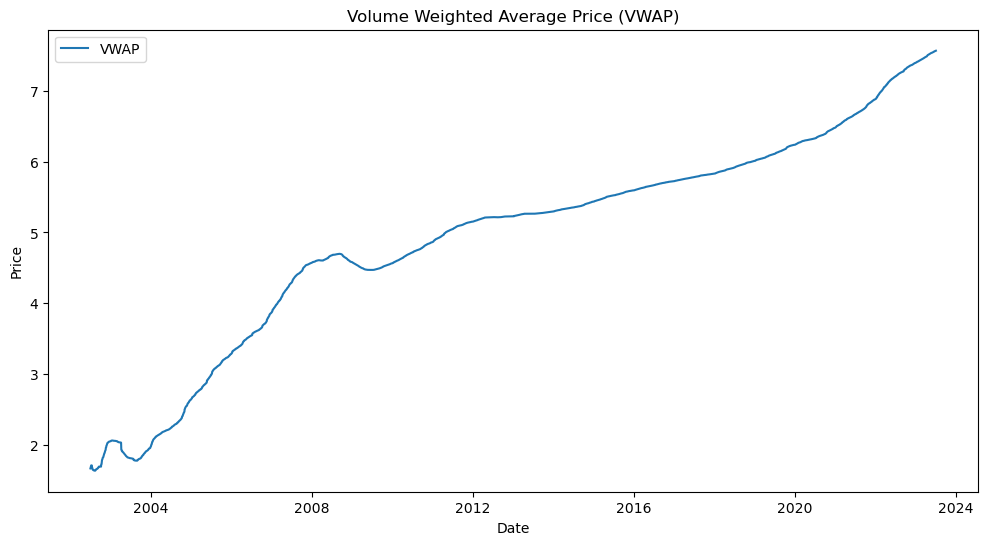

In [60]:
vwap = calculate_vwap(dataset_1.iloc[:,:6])

# Plotting VWAP
plt.figure(figsize=(12, 6))
plt.plot(vwap, label='VWAP')
plt.title('Volume Weighted Average Price (VWAP)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
dataset_1['Volume_Weighted_Average_price']=vwap
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  CLOSE_IND_MACD_HISTOGRAM  CLOSE_IND_SAR  \
Date                             ...                                            
2002-07-05             0.036094  ...                  0.001121       1.671875   
2002-07-08             0.034505  ...                 -0.000375       1.671875   
2002-07-09             0.034861  ...                 -0.000015       1.672813   
2002-07-10             0.034468  ...                 -0.000326       1.675663   
2002-07-11             0.036684  ...                  0.001512       1.678342   

            bollinger_bands_sma  bollinger_bands_upper_band  \
Date                                                          
2002-07-05             1.671875                    1.671875   
2002-07-08             1.695313                    1.695313   
2002-07-09             1.720313                    1.720313   
2002-07-10             1.716875                    1.716875   
2002-07-11             1.753438                    1.753438   

            bollinger_bands_lower_band  SO_k_values  SO_D_values       ATR  \
Date                                                                         
2002-07-05                    1.671875    47.738273    47.738273  0.062187   
2002-07-08                    1.695313    69.959308    58.848791  0.054531   
2002-07-09                    1.720313    80.645161    66.114248  0.061146   
2002-07-10                    1.716875    63.903316    71.502595  0.062813   
2002-07-11                    1.753438    93.438713    79.329063  0.070625   

            On-Balance_volume  Volume_Weighted_Average_price  
Date                                                          
2002-07-05                  0                       1.672813  
2002-07-08            3520000                       1.690164  
2002-07-09            7760000                       1.698847  
2002-07-10            5395200                       1.703871  
2002-07-11            8784000                       1.708745  

[5 rows x 21 columns]

# Calling Chaikin MOney flow function

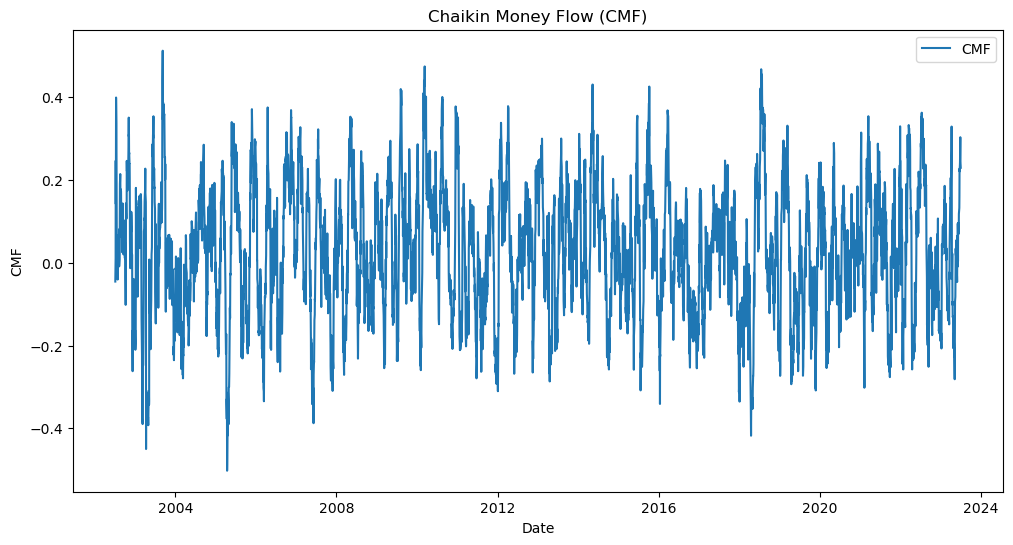

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  CLOSE_IND_SAR  bollinger_bands_sma  \
Date                             ...                                       
2002-07-05             0.036094  ...       1.671875             1.671875   
2002-07-08             0.034505  ...       1.671875             1.695313   
2002-07-09             0.034861  ...       1.672813             1.720313   
2002-07-10             0.034468  ...       1.675663             1.716875   
2002-07-11             0.036684  ...       1.678342             1.753438   

            bollinger_bands_upper_band  bollinger_bands_lower_band  \
Date                                                                 
2002-07-05                    1.671875                    1.671875   
2002-07-08                    1.695313                    1.695313   
2002-07-09                    1.720313                    1.720313   
2002-07-10                    1.716875                    1.716875   
2002-07-11                    1.753438                    1.753438   

            SO_k_values  SO_D_values       ATR  On-Balance_volume  \
Date                                                                
2002-07-05    47.738273    47.738273  0.062187                  0   
2002-07-08    69.959308    58.848791  0.054531            3520000   
2002-07-09    80.645161    66.114248  0.061146            7760000   
2002-07-10    63.903316    71.502595  0.062813            5395200   
2002-07-11    93.438713    79.329063  0.070625            8784000   

            Volume_Weighted_Average_price  Chaikin_money_flow  
Date                                                           
2002-07-05                       1.672813           -0.045235  
2002-07-08                       1.690164            0.011276  
2002-07-09                       1.698847            0.246869  
2002-07-10                       1.703871            0.142096  
2002-07-11                       1.708745            0.307055  

[5 rows x 22 columns]

In [65]:
cmf = calculate_cmf(dataset_1.iloc[:,:6])

# Plotting CMF
plt.figure(figsize=(12, 6))
plt.plot(cmf, label='CMF')
plt.title('Chaikin Money Flow (CMF)')
plt.xlabel('Date')
plt.ylabel('CMF')
plt.legend()
plt.show()
dataset_1['Chaikin_money_flow']=cmf
dataset_1.head()

# Calling average Directional Index(ADI) function

In [70]:
adx = calculate_adx(dataset_1, period=14)
dataset_1['Average_Directional_index']=adx
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  bollinger_bands_sma  \
Date                             ...                        
2002-07-05             0.036094  ...             1.671875   
2002-07-08             0.034505  ...             1.695313   
2002-07-09             0.034861  ...             1.720313   
2002-07-10             0.034468  ...             1.716875   
2002-07-11             0.036684  ...             1.753438   

            bollinger_bands_upper_band  bollinger_bands_lower_band  \
Date                                                                 
2002-07-05                    1.671875                    1.671875   
2002-07-08                    1.695313                    1.695313   
2002-07-09                    1.720313                    1.720313   
2002-07-10                    1.716875                    1.716875   
2002-07-11                    1.753438                    1.753438   

            SO_k_values  SO_D_values       ATR  On-Balance_volume  \
Date                                                                
2002-07-05    47.738273    47.738273  0.062187                  0   
2002-07-08    69.959308    58.848791  0.054531            3520000   
2002-07-09    80.645161    66.114248  0.061146            7760000   
2002-07-10    63.903316    71.502595  0.062813            5395200   
2002-07-11    93.438713    79.329063  0.070625            8784000   

            Volume_Weighted_Average_price  Chaikin_money_flow  \
Date                                                            
2002-07-05                       1.672813           -0.045235   
2002-07-08                       1.690164            0.011276   
2002-07-09                       1.698847            0.246869   
2002-07-10                       1.703871            0.142096   
2002-07-11                       1.708745            0.307055   

            Average_Directional_index  
Date                                   
2002-07-05                 100.000000  
2002-07-08                 100.000000  
2002-07-09                 123.330726  
2002-07-10                 124.643845  
2002-07-11                 222.715989  

[5 rows x 23 columns]

#  calling parabolic SAR function

In [74]:
parabolic_sar = calculate_parabolic_sar(dataset_1)
dataset_1['Parab_SAR']=parabolic_sar
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  bollinger_bands_upper_band  \
Date                             ...                               
2002-07-05             0.036094  ...                    1.671875   
2002-07-08             0.034505  ...                    1.695313   
2002-07-09             0.034861  ...                    1.720313   
2002-07-10             0.034468  ...                    1.716875   
2002-07-11             0.036684  ...                    1.753438   

            bollinger_bands_lower_band  SO_k_values  SO_D_values       ATR  \
Date                                                                         
2002-07-05                    1.671875    47.738273    47.738273  0.062187   
2002-07-08                    1.695313    69.959308    58.848791  0.054531   
2002-07-09                    1.720313    80.645161    66.114248  0.061146   
2002-07-10                    1.716875    63.903316    71.502595  0.062813   
2002-07-11                    1.753438    93.438713    79.329063  0.070625   

            On-Balance_volume  Volume_Weighted_Average_price  \
Date                                                           
2002-07-05                  0                       1.672813   
2002-07-08            3520000                       1.690164   
2002-07-09            7760000                       1.698847   
2002-07-10            5395200                       1.703871   
2002-07-11            8784000                       1.708745   

            Chaikin_money_flow  Average_Directional_index  Parab_SAR  
Date                                                                  
2002-07-05           -0.045235                 100.000000   1.642188  
2002-07-08            0.011276                 100.000000   1.645225  
2002-07-09            0.246869                 123.330726   1.650856  
2002-07-10            0.142096                 124.643845   1.659512  
2002-07-11            0.307055                 222.715989   1.761250  

[5 rows x 24 columns]

# Calling Commodity channel index function

In [78]:
cci = calculate_cci(dataset_1.iloc[:,:6], period=20)
dataset_1["Commodity_channel_index(CCI"]=cci
dataset_1.head()


Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  bollinger_bands_lower_band  SO_k_values  \
Date                             ...                                            
2002-07-05             0.036094  ...                    1.671875    47.738273   
2002-07-08             0.034505  ...                    1.695313    69.959308   
2002-07-09             0.034861  ...                    1.720313    80.645161   
2002-07-10             0.034468  ...                    1.716875    63.903316   
2002-07-11             0.036684  ...                    1.753438    93.438713   

            SO_D_values       ATR  On-Balance_volume  \
Date                                                   
2002-07-05    47.738273  0.062187                  0   
2002-07-08    58.848791  0.054531            3520000   
2002-07-09    66.114248  0.061146            7760000   
2002-07-10    71.502595  0.062813            5395200   
2002-07-11    79.329063  0.070625            8784000   

            Volume_Weighted_Average_price  Chaikin_money_flow  \
Date                                                            
2002-07-05                       1.672813           -0.045235   
2002-07-08                       1.690164            0.011276   
2002-07-09                       1.698847            0.246869   
2002-07-10                       1.703871            0.142096   
2002-07-11                       1.708745            0.307055   

            Average_Directional_index  Parab_SAR  Commodity_channel_index(CCI  
Date                                                                           
2002-07-05                 100.000000   1.642188                    11.665319  
2002-07-08                 100.000000   1.645225                   133.333333  
2002-07-09                 123.330726   1.650856                   118.670742  
2002-07-10                 124.643845   1.659512                   121.901335  
2002-07-11                 222.715989   1.761250                    95.638414  

[5 rows x 25 columns]

# Calling function Moving Average Envelope

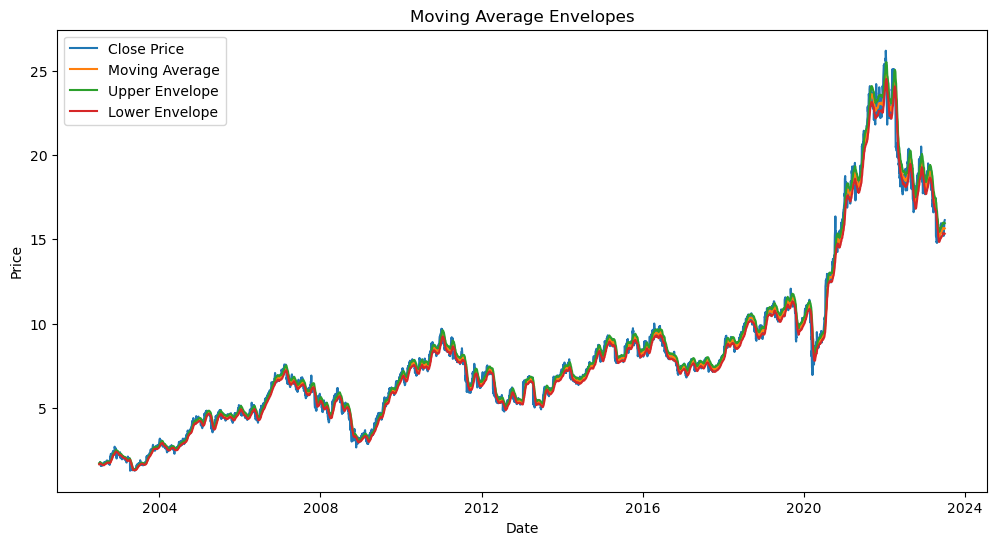

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...       ATR  On-Balance_volume  \
Date                             ...                                
2002-07-05             0.036094  ...  0.062187                  0   
2002-07-08             0.034505  ...  0.054531            3520000   
2002-07-09             0.034861  ...  0.061146            7760000   
2002-07-10             0.034468  ...  0.062813            5395200   
2002-07-11             0.036684  ...  0.070625            8784000   

            Volume_Weighted_Average_price  Chaikin_money_flow  \
Date                                                            
2002-07-05                       1.672813           -0.045235   
2002-07-08                       1.690164            0.011276   
2002-07-09                       1.698847            0.246869   
2002-07-10                       1.703871            0.142096   
2002-07-11                       1.708745            0.307055   

            Average_Directional_index  Parab_SAR  Commodity_channel_index(CCI  \
Date                                                                            
2002-07-05                 100.000000   1.642188                    11.665319   
2002-07-08                 100.000000   1.645225                   133.333333   
2002-07-09                 123.330726   1.650856                   118.670742   
2002-07-10                 124.643845   1.659512                   121.901335   
2002-07-11                 222.715989   1.761250                    95.638414   

            MAE_upper  MAE_middle  MAE_lower  
Date                                          
2002-07-05   1.705313    1.671875   1.638437  
2002-07-08   1.717266    1.683594   1.649922  
2002-07-09   1.729750    1.695834   1.661917  
2002-07-10   1.735116    1.701094   1.667072  
2002-07-11   1.745794    1.711563   1.677332  

[5 rows x 28 columns]

In [84]:
ma, upper, lower = calculate_envelopes(dataset_1.iloc[:,:6], period=20, percentage=2)
# Plotting the Envelopes
plt.figure(figsize=(12, 6))
plt.plot(dataset_1['Close'], label='Close Price')
plt.plot(ma, label='Moving Average')
plt.plot(upper, label='Upper Envelope')
plt.plot(lower, label='Lower Envelope')
plt.title('Moving Average Envelopes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


dataset_1['MAE_upper']=upper
dataset_1['MAE_middle']=ma
dataset_1['MAE_lower']=lower
dataset_1.head()


# Rate Of Change (ROC)

In [91]:
roc = calculate_roc(dataset_1.iloc[:,:6], period=14)
dataset_1['ROC']=roc
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  On-Balance_volume  \
Date                             ...                      
2002-07-05             0.036094  ...                  0   
2002-07-08             0.034505  ...            3520000   
2002-07-09             0.034861  ...            7760000   
2002-07-10             0.034468  ...            5395200   
2002-07-11             0.036684  ...            8784000   

            Volume_Weighted_Average_price  Chaikin_money_flow  \
Date                                                            
2002-07-05                       1.672813           -0.045235   
2002-07-08                       1.690164            0.011276   
2002-07-09                       1.698847            0.246869   
2002-07-10                       1.703871            0.142096   
2002-07-11                       1.708745            0.307055   

            Average_Directional_index  Parab_SAR  Commodity_channel_index(CCI  \
Date                                                                            
2002-07-05                 100.000000   1.642188                    11.665319   
2002-07-08                 100.000000   1.645225                   133.333333   
2002-07-09                 123.330726   1.650856                   118.670742   
2002-07-10                 124.643845   1.659512                   121.901335   
2002-07-11                 222.715989   1.761250                    95.638414   

            MAE_upper  MAE_middle  MAE_lower      ROC  
Date                                                   
2002-07-05   1.705313    1.671875   1.638437  0.36337  
2002-07-08   1.717266    1.683594   1.649922  0.36337  
2002-07-09   1.729750    1.695834   1.661917  0.36337  
2002-07-10   1.735116    1.701094   1.667072  0.36337  
2002-07-11   1.745794    1.711563   1.677332  0.36337  

[5 rows x 29 columns]

# Calling Williams %R function 

In [93]:
williams_r = calculate_williams_r(dataset_1.iloc[:,:6], period=14)
dataset_1['Williams_%R']=williams_r
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  Volume_Weighted_Average_price  \
Date                             ...                                  
2002-07-05             0.036094  ...                       1.672813   
2002-07-08             0.034505  ...                       1.690164   
2002-07-09             0.034861  ...                       1.698847   
2002-07-10             0.034468  ...                       1.703871   
2002-07-11             0.036684  ...                       1.708745   

            Chaikin_money_flow  Average_Directional_index  Parab_SAR  \
Date                                                                   
2002-07-05           -0.045235                 100.000000   1.642188   
2002-07-08            0.011276                 100.000000   1.645225   
2002-07-09            0.246869                 123.330726   1.650856   
2002-07-10            0.142096                 124.643845   1.659512   
2002-07-11            0.307055                 222.715989   1.761250   

            Commodity_channel_index(CCI  MAE_upper  MAE_middle  MAE_lower  \
Date                                                                        
2002-07-05                    11.665319   1.705313    1.671875   1.638437   
2002-07-08                   133.333333   1.717266    1.683594   1.649922   
2002-07-09                   118.670742   1.729750    1.695834   1.661917   
2002-07-10                   121.901335   1.735116    1.701094   1.667072   
2002-07-11                    95.638414   1.745794    1.711563   1.677332   

                ROC  Williams_%R  
Date                              
2002-07-05  0.36337   -52.261727  
2002-07-08  0.36337   -30.040692  
2002-07-09  0.36337   -19.354839  
2002-07-10  0.36337   -36.096684  
2002-07-11  0.36337    -6.561287  

[5 rows x 30 columns]

# Calling PROC function

In [101]:
proc = calculate_proc(dataset_1.iloc[:,:6], period=12)
dataset_1['PROC']=proc
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  Chaikin_money_flow  \
Date                             ...                       
2002-07-05             0.036094  ...           -0.045235   
2002-07-08             0.034505  ...            0.011276   
2002-07-09             0.034861  ...            0.246869   
2002-07-10             0.034468  ...            0.142096   
2002-07-11             0.036684  ...            0.307055   

            Average_Directional_index  Parab_SAR  Commodity_channel_index(CCI  \
Date                                                                            
2002-07-05                 100.000000   1.642188                    11.665319   
2002-07-08                 100.000000   1.645225                   133.333333   
2002-07-09                 123.330726   1.650856                   118.670742   
2002-07-10                 124.643845   1.659512                   121.901335   
2002-07-11                 222.715989   1.761250                    95.638414   

            MAE_upper  MAE_middle  MAE_lower      ROC  Williams_%R        PROC  
Date                                                                            
2002-07-05   1.705313    1.671875   1.638437  0.36337   -52.261727  100.766994  
2002-07-08   1.717266    1.683594   1.649922  0.36337   -30.040692  100.766994  
2002-07-09   1.729750    1.695834   1.661917  0.36337   -19.354839  100.766994  
2002-07-10   1.735116    1.701094   1.667072  0.36337   -36.096684  100.766994  
2002-07-11   1.745794    1.711563   1.677332  0.36337    -6.561287  100.766994  

[5 rows x 31 columns]

# Calling Chande Momentum Oscillator

In [106]:
cmo = calculate_cmo(dataset_1.iloc[:,:6], period=20)
dataset_1["CMO"]=cmo
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  Average_Directional_index  Parab_SAR  \
Date                             ...                                         
2002-07-05             0.036094  ...                 100.000000   1.642188   
2002-07-08             0.034505  ...                 100.000000   1.645225   
2002-07-09             0.034861  ...                 123.330726   1.650856   
2002-07-10             0.034468  ...                 124.643845   1.659512   
2002-07-11             0.036684  ...                 222.715989   1.761250   

            Commodity_channel_index(CCI  MAE_upper  MAE_middle  MAE_lower  \
Date                                                                        
2002-07-05                    11.665319   1.705313    1.671875   1.638437   
2002-07-08                   133.333333   1.717266    1.683594   1.649922   
2002-07-09                   118.670742   1.729750    1.695834   1.661917   
2002-07-10                   121.901335   1.735116    1.701094   1.667072   
2002-07-11                    95.638414   1.745794    1.711563   1.677332   

                ROC  Williams_%R        PROC         CMO  
Date                                                      
2002-07-05  0.36337   -52.261727  100.766994  100.000000  
2002-07-08  0.36337   -30.040692  100.766994  100.000000  
2002-07-09  0.36337   -19.354839  100.766994  100.000000  
2002-07-10  0.36337   -36.096684  100.766994   33.333333  
2002-07-11  0.36337    -6.561287  100.766994   50.000000  

[5 rows x 32 columns]

# Calling Accumulation/Distribution Line(A/D_Line)

In [109]:
ad_line = calculate_ad_line(dataset_1.iloc[:,:6])
print(ad_line)
dataset_1['A/D_Line']=ad_line
dataset_1.head()

Date
2002-07-05   -4.342515e+04
2002-07-08    5.051661e+04
2002-07-09    2.152701e+06
2002-07-10    1.575110e+06
2002-07-11    4.444189e+06
                  ...     
2023-06-27    1.583017e+09
2023-06-28    1.589170e+09
2023-06-29    1.595773e+09
2023-06-30    1.588327e+09
2023-07-03    1.586336e+09
Length: 5285, dtype: float64


Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  Parab_SAR  Commodity_channel_index(CCI  \
Date                             ...                                           
2002-07-05             0.036094  ...   1.642188                    11.665319   
2002-07-08             0.034505  ...   1.645225                   133.333333   
2002-07-09             0.034861  ...   1.650856                   118.670742   
2002-07-10             0.034468  ...   1.659512                   121.901335   
2002-07-11             0.036684  ...   1.761250                    95.638414   

            MAE_upper  MAE_middle  MAE_lower      ROC  Williams_%R  \
Date                                                                 
2002-07-05   1.705313    1.671875   1.638437  0.36337   -52.261727   
2002-07-08   1.717266    1.683594   1.649922  0.36337   -30.040692   
2002-07-09   1.729750    1.695834   1.661917  0.36337   -19.354839   
2002-07-10   1.735116    1.701094   1.667072  0.36337   -36.096684   
2002-07-11   1.745794    1.711563   1.677332  0.36337    -6.561287   

                  PROC         CMO      A/D_Line  
Date                                              
2002-07-05  100.766994  100.000000 -4.342515e+04  
2002-07-08  100.766994  100.000000  5.051661e+04  
2002-07-09  100.766994  100.000000  2.152701e+06  
2002-07-10  100.766994   33.333333  1.575110e+06  
2002-07-11  100.766994   50.000000  4.444189e+06  

[5 rows x 33 columns]

# calling TRIX function

In [112]:
trix = calculate_trix(dataset_1.iloc[:,:6], period=15)
dataset_1['TRIX']=trix
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  Commodity_channel_index(CCI  MAE_upper  \
Date                             ...                                           
2002-07-05             0.036094  ...                    11.665319   1.705313   
2002-07-08             0.034505  ...                   133.333333   1.717266   
2002-07-09             0.034861  ...                   118.670742   1.729750   
2002-07-10             0.034468  ...                   121.901335   1.735116   
2002-07-11             0.036684  ...                    95.638414   1.745794   

            MAE_middle  MAE_lower      ROC  Williams_%R        PROC  \
Date                                                                  
2002-07-05    1.671875   1.638437  0.36337   -52.261727  100.766994   
2002-07-08    1.683594   1.649922  0.36337   -30.040692  100.766994   
2002-07-09    1.695834   1.661917  0.36337   -19.354839  100.766994   
2002-07-10    1.701094   1.667072  0.36337   -36.096684  100.766994   
2002-07-11    1.711563   1.677332  0.36337    -6.561287  100.766994   

                   CMO      A/D_Line      TRIX  
Date                                            
2002-07-05  100.000000 -4.342515e+04  0.042760  
2002-07-08  100.000000  5.051661e+04  0.002738  
2002-07-09  100.000000  2.152701e+06  0.010108  
2002-07-10   33.333333  1.575110e+06  0.019840  
2002-07-11   50.000000  4.444189e+06  0.034965  

[5 rows x 34 columns]

# Ease of Movement(EOM)

In [118]:
eom = calculate_eom(dataset_1.iloc[:,:6], period=14)
dataset_1['EOM']=eom
dataset_1.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  MAE_upper  MAE_middle  MAE_lower  \
Date                             ...                                     
2002-07-05             0.036094  ...   1.705313    1.671875   1.638437   
2002-07-08             0.034505  ...   1.717266    1.683594   1.649922   
2002-07-09             0.034861  ...   1.729750    1.695834   1.661917   
2002-07-10             0.034468  ...   1.735116    1.701094   1.667072   
2002-07-11             0.036684  ...   1.745794    1.711563   1.677332   

                ROC  Williams_%R        PROC         CMO      A/D_Line  \
Date                                                                     
2002-07-05  0.36337   -52.261727  100.766994  100.000000 -4.342515e+04   
2002-07-08  0.36337   -30.040692  100.766994  100.000000  5.051661e+04   
2002-07-09  0.36337   -19.354839  100.766994  100.000000  2.152701e+06   
2002-07-10  0.36337   -36.096684  100.766994   33.333333  1.575110e+06   
2002-07-11  0.36337    -6.561287  100.766994   50.000000  4.444189e+06   

                TRIX           EOM  
Date                                
2002-07-05  0.042760  1.272137e-10  
2002-07-08  0.002738  2.850586e-10  
2002-07-09  0.010108  1.260867e-10  
2002-07-10  0.019840  6.676059e-10  
2002-07-11  0.034965 -4.462442e-10  

[5 rows x 35 columns]

In [120]:
dataset_1=dataset_1.drop(['Parab_SAR'],axis=1)
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5285 entries, 2002-07-05 to 2023-07-03
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Open                           5285 non-null   float64
 1   High                           5285 non-null   float64
 2   Low                            5285 non-null   float64
 3   Close                          5285 non-null   float64
 4   Adj Close                      5285 non-null   float64
 5   Volume                         5285 non-null   int64  
 6   CLOSE_MOV_AVG_IND              5285 non-null   float64
 7   CLOSE_EMA_IND                  5285 non-null   float64
 8   CLOSE_RSI_IND                  5285 non-null   float64
 9   CLOSE_IND_MACD_LINE            5285 non-null   float64
 10  CLOSE_IND_MACD_SINGLE_LINE     5285 non-null   float64
 11  CLOSE_IND_MACD_HISTOGRAM       5285 non-null   float64
 12  CLOSE_IND_SAR                 

In [121]:
dataset_1.to_csv("final_dataset_indicator.csv")